In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [138]:
df = pd.read_csv('all_match_results.csv')

In [139]:
print(df.head())

          Date        HomeTeam Result                  AwayTeam
0  13-Aug-2021       Brentford    2:0                   Arsenal
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion
2  14-Aug-2021         Chelsea    3:0            Crystal Palace
3  14-Aug-2021         Everton    3:1               Southampton
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers


In [140]:
print(type(df['Result']))

<class 'pandas.core.series.Series'>


In [141]:
result_part = df['Result'].str.extract(r'(\d+:\d+)')

# Split the extracted values into hours and minutes
result_part_split = result_part[0].str.split(":")
result_home, result_away = result_part_split.str[0], result_part_split.str[1]

# Convert the values to integers
result_home = result_home.astype(int)
result_away = result_away.astype(int)

print(result_home)
print(result_away)

0      2
1      1
2      3
3      3
4      1
      ..
375    1
376    4
377    3
378    3
379    0
Name: 0, Length: 380, dtype: int32
0      0
1      2
2      0
3      1
4      0
      ..
375    0
376    1
377    1
378    2
379    5
Name: 0, Length: 380, dtype: int32


In [142]:
df['ScoreHome'] = result_home
df['ScoreAway'] = result_away
print(df.head())

          Date        HomeTeam Result                  AwayTeam  ScoreHome  \
0  13-Aug-2021       Brentford    2:0                   Arsenal          2   
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion          1   
2  14-Aug-2021         Chelsea    3:0            Crystal Palace          3   
3  14-Aug-2021         Everton    3:1               Southampton          3   
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers          1   

   ScoreAway  
0          0  
1          2  
2          0  
3          1  
4          0  


In [143]:
def result_category_home(ScoreHome, ScoreAway):
    if ScoreHome > ScoreAway:
        return 'home_win'
    elif ScoreHome == ScoreAway:
        return 'home_draw'
    else:
        return 'home_lose'

df['result_home'] = df.apply(lambda row: result_category_home(row['ScoreHome'], row['ScoreAway']), axis=1)

In [144]:
print(df.head())

          Date        HomeTeam Result                  AwayTeam  ScoreHome  \
0  13-Aug-2021       Brentford    2:0                   Arsenal          2   
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion          1   
2  14-Aug-2021         Chelsea    3:0            Crystal Palace          3   
3  14-Aug-2021         Everton    3:1               Southampton          3   
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers          1   

   ScoreAway result_home  
0          0    home_win  
1          2   home_lose  
2          0    home_win  
3          1    home_win  
4          0    home_win  


In [145]:
def result_category_away(ScoreHome, ScoreAway):
    if ScoreHome < ScoreAway:
        return 'away_win'
    elif ScoreHome == ScoreAway:
        return 'away_draw'
    else:
        return 'away_lose'

df['result_away'] = df.apply(lambda row: result_category_away(row['ScoreHome'], row['ScoreAway']), axis=1)

print(df.head())

          Date        HomeTeam Result                  AwayTeam  ScoreHome  \
0  13-Aug-2021       Brentford    2:0                   Arsenal          2   
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion          1   
2  14-Aug-2021         Chelsea    3:0            Crystal Palace          3   
3  14-Aug-2021         Everton    3:1               Southampton          3   
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers          1   

   ScoreAway result_home result_away  
0          0    home_win   away_lose  
1          2   home_lose    away_win  
2          0    home_win   away_lose  
3          1    home_win   away_lose  
4          0    home_win   away_lose  


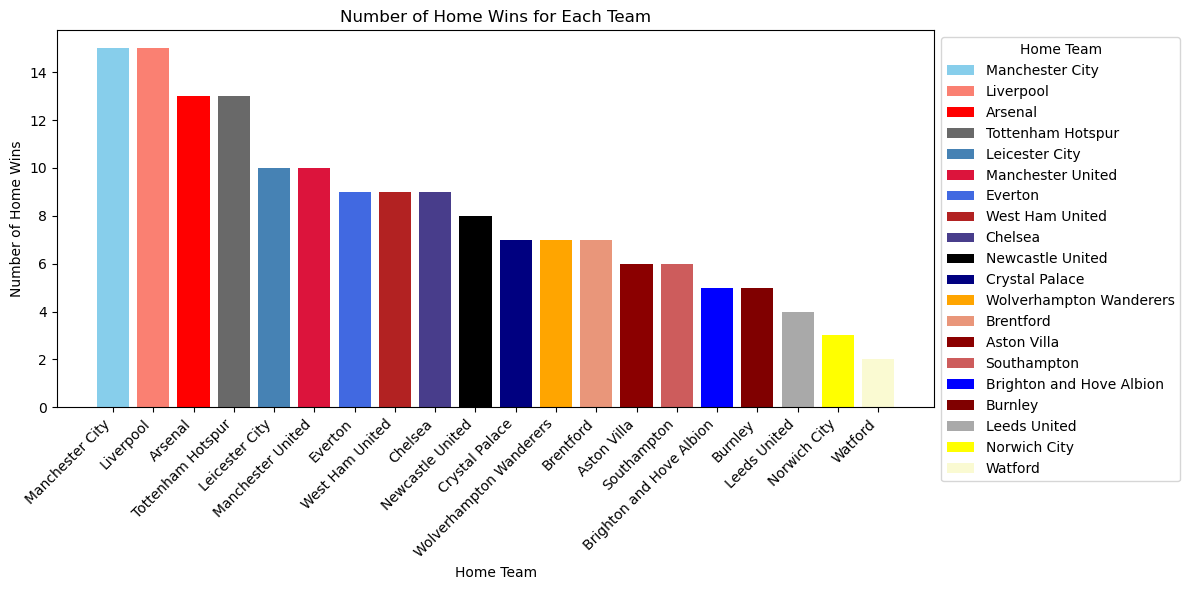

In [146]:
home_win_counts = df[df['result_home'] == 'home_win']['HomeTeam'].value_counts()

# Team colors dictionary
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'salmon',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create a bar plot with team colors
plt.figure(figsize=(12, 6))
bars = plt.bar(home_win_counts.index, home_win_counts.values, color=[team_colors.get(team, 'gray') for team in home_win_counts.index])

# Add labels and title
plt.xlabel('Home Team')
plt.ylabel('Number of Home Wins')
plt.title('Number of Home Wins for Each Team')
plt.xticks(rotation=45, ha='right')

# Add legend with team names
plt.legend(bars, home_win_counts.index, title='Home Team', loc='best', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

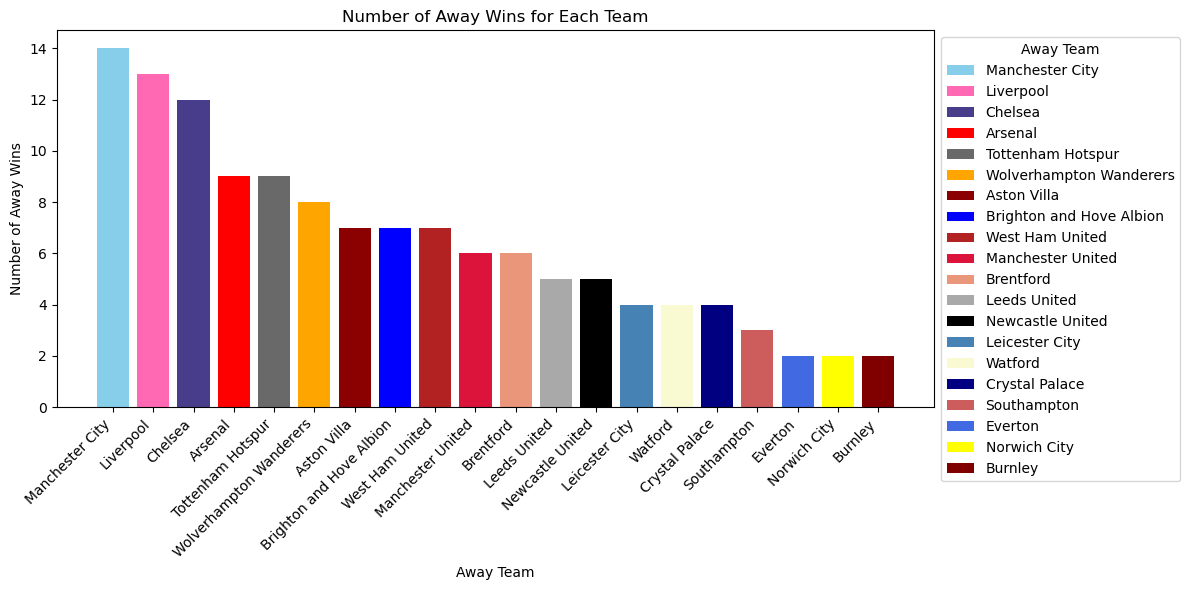

In [147]:
# Group by 'AwayTeam' and count the occurrences of 'away_win'
away_win_counts = df[df['result_away'] == 'away_win']['AwayTeam'].value_counts()

# Team colors dictionary
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create a bar plot with team colors
plt.figure(figsize=(12, 6))
bars = plt.bar(away_win_counts.index, away_win_counts.values, color=[team_colors.get(team, 'gray') for team in away_win_counts.index])

# Add labels and title
plt.xlabel('Away Team')
plt.ylabel('Number of Away Wins')
plt.title('Number of Away Wins for Each Team')
plt.xticks(rotation=45, ha='right')

# Add legend with team names
plt.legend(bars, away_win_counts.index, title='Away Team', loc='best', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

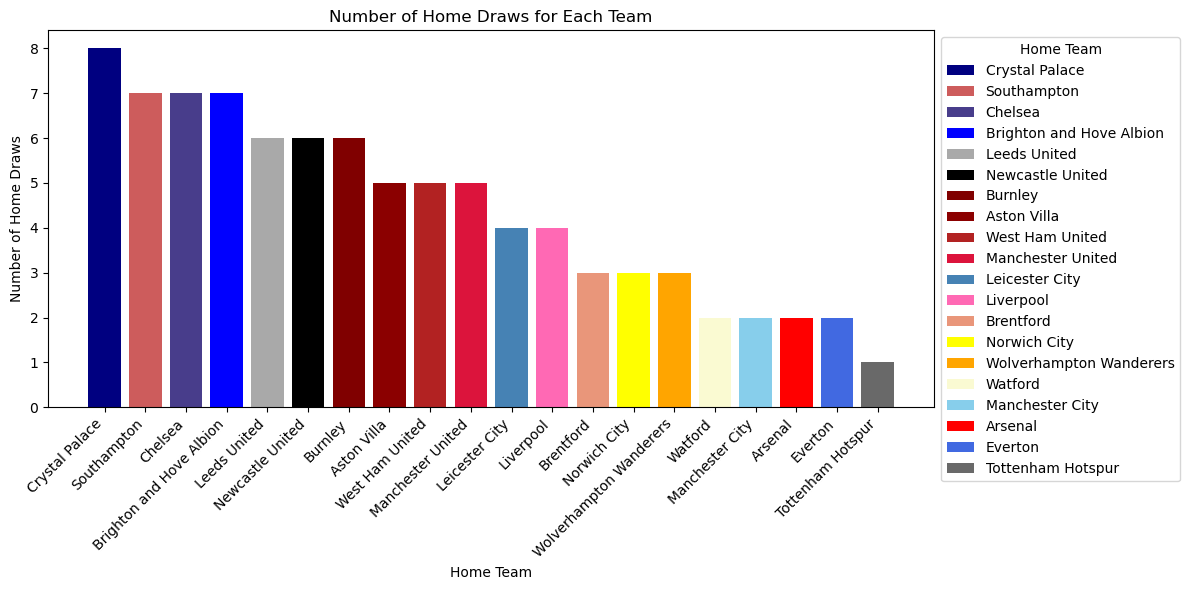

In [148]:
# Group by 'HomeTeam' and count the occurrences of 'home_draw'
home_draw_counts = df[df['result_home'] == 'home_draw']['HomeTeam'].value_counts()

# Team colors dictionary
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create a bar plot with team colors
plt.figure(figsize=(12, 6))
bars = plt.bar(home_draw_counts.index, home_draw_counts.values, color=[team_colors.get(team, 'gray') for team in home_draw_counts.index])

# Add labels and title
plt.xlabel('Home Team')
plt.ylabel('Number of Home Draws')
plt.title('Number of Home Draws for Each Team')
plt.xticks(rotation=45, ha='right')

# Add legend with team names
plt.legend(bars, home_draw_counts.index, title='Home Team', loc='best', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

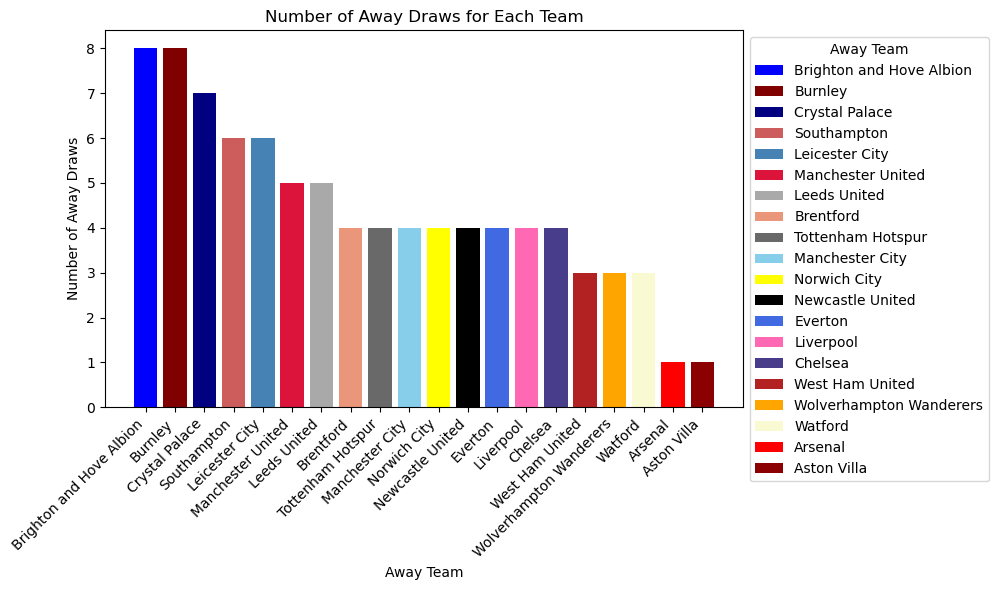

In [149]:
# Group by 'AwayTeam' and count the occurrences of 'away_draw'
away_draw_counts = df[df['result_away'] == 'away_draw']['AwayTeam'].value_counts()

# Define colors for each team (optional, you can use other color palettes)
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create a bar plot with different colors for each team
plt.figure(figsize=(10, 6))
bars = plt.bar(away_draw_counts.index, away_draw_counts.values, color=[team_colors.get(team, 'gray') for team in away_draw_counts.index])
plt.xlabel('Away Team')
plt.ylabel('Number of Away Draws')
plt.title('Number of Away Draws for Each Team')
plt.xticks(rotation=45, ha='right')

# Add legend with team names and colors
plt.legend(bars, away_draw_counts.index, title='Away Team', loc='best', bbox_to_anchor=(1.0, 1.0))

plt.tight_layout()
plt.show()

In [150]:
df.head()

,Date,HomeTeam,Result,AwayTeam,ScoreHome,ScoreAway,result_home,result_away
0,13-Aug-2021,Brentford,2:0,Arsenal,2,0,home_win,away_lose
1,14-Aug-2021,Burnley,1:2,Brighton and Hove Albion,1,2,home_lose,away_win
2,14-Aug-2021,Chelsea,3:0,Crystal Palace,3,0,home_win,away_lose
3,14-Aug-2021,Everton,3:1,Southampton,3,1,home_win,away_lose
4,14-Aug-2021,Leicester City,1:0,Wolverhampton Wanderers,1,0,home_win,away_lose


In [151]:
def ranking_team_home(HomeTeam):
    if HomeTeam == 'Manchester City':
        return 1
    elif HomeTeam == 'Liverpool':
        return 2
    elif HomeTeam == 'Chelsea':
        return 3
    elif HomeTeam == 'Tottenham Hotspur':
        return 4
    elif HomeTeam == 'Arsenal':
        return 5
    elif HomeTeam == 'Manchester United':
        return 6
    elif HomeTeam == 'West Ham':
        return 7
    elif HomeTeam == 'Leicester City':
        return 8
    elif HomeTeam == 'Brighton and Hove Ablbion':
        return 9
    elif HomeTeam == 'Wolverhampton Wanderers':
        return 10
    elif HomeTeam == 'Newcastle United':
        return 11
    elif HomeTeam == 'Crystal Palace':
        return 12
    elif HomeTeam == 'Brentford':
        return 13
    elif HomeTeam == 'Aston Villa':
        return 14
    elif HomeTeam == 'Southampthon':
        return 15
    elif HomeTeam == 'Everton':
        return 16
    elif HomeTeam == 'Leeds United':
        return 17
    else:
        return 18
    
df['team_rank_home'] = df['HomeTeam'].apply(ranking_team_home)
print(df.head())

          Date        HomeTeam Result                  AwayTeam  ScoreHome  \
0  13-Aug-2021       Brentford    2:0                   Arsenal          2   
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion          1   
2  14-Aug-2021         Chelsea    3:0            Crystal Palace          3   
3  14-Aug-2021         Everton    3:1               Southampton          3   
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers          1   

   ScoreAway result_home result_away  team_rank_home  
0          0    home_win   away_lose              13  
1          2   home_lose    away_win              18  
2          0    home_win   away_lose               3  
3          1    home_win   away_lose              16  
4          0    home_win   away_lose               8  


In [152]:
def ranking_team_away(AwayTeam):
    if AwayTeam == 'Manchester City':
        return 1
    elif AwayTeam == 'Liverpool':
        return 2
    elif AwayTeam == 'Chelsea':
        return 3
    elif AwayTeam == 'Tottenham Hotspur':
        return 4
    elif AwayTeam == 'Arsenal':
        return 5
    elif AwayTeam == 'Manchester United':
        return 6
    elif AwayTeam == 'West Ham':
        return 7
    elif AwayTeam == 'Leicester City':
        return 8
    elif AwayTeam == 'Brighton and Hove Ablbion':
        return 9
    elif AwayTeam == 'Wolverhampton Wanderers':
        return 10
    elif AwayTeam == 'Newcastle United':
        return 11
    elif AwayTeam == 'Crystal Palace':
        return 12
    elif AwayTeam == 'Brentford':
        return 13
    elif AwayTeam == 'Aston Villa':
        return 14
    elif AwayTeam == 'Southampthon':
        return 15
    elif AwayTeam == 'Everton':
        return 16
    elif AwayTeam == 'Leeds United':
        return 17
    else:
        return 18
    
df['team_rank_away'] = df['AwayTeam'].apply(ranking_team_away)
print(df.head())

          Date        HomeTeam Result                  AwayTeam  ScoreHome  \
0  13-Aug-2021       Brentford    2:0                   Arsenal          2   
1  14-Aug-2021         Burnley    1:2  Brighton and Hove Albion          1   
2  14-Aug-2021         Chelsea    3:0            Crystal Palace          3   
3  14-Aug-2021         Everton    3:1               Southampton          3   
4  14-Aug-2021  Leicester City    1:0   Wolverhampton Wanderers          1   

   ScoreAway result_home result_away  team_rank_home  team_rank_away  
0          0    home_win   away_lose              13               5  
1          2   home_lose    away_win              18              18  
2          0    home_win   away_lose               3              12  
3          1    home_win   away_lose              16              18  
4          0    home_win   away_lose               8              10  


In [153]:
# Prepare the data
X = df[['team_rank_home', 'team_rank_away']]
y = df['result_home']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a DataFrame for incorrect predictions
incorrect_predictions = pd.DataFrame({
    'HomeTeam': df.loc[X_test[y_test != y_pred].index, 'HomeTeam'].values,
    'AwayTeam': df.loc[X_test[y_test != y_pred].index, 'AwayTeam'].values,
    'team_rank_home': df.loc[X_test[y_test != y_pred].index, 'team_rank_home'].values,
    'team_rank_away': df.loc[X_test[y_test != y_pred].index, 'team_rank_away'].values,
    'Predicted_Result': y_pred[y_test != y_pred],
    'Actual_Result': y_test[y_test != y_pred]
})

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

print("\nIncorrect Predictions:")
print(incorrect_predictions)

Classification Report:
              precision    recall  f1-score   support

   home_draw       0.00      0.00      0.00        14
   home_lose       0.58      0.64      0.61        28
    home_win       0.64      0.82      0.72        34

    accuracy                           0.61        76
   macro avg       0.41      0.49      0.44        76
weighted avg       0.50      0.61      0.55        76


Incorrect Predictions:
                    HomeTeam                  AwayTeam  team_rank_home  \
33            Crystal Palace         Tottenham Hotspur              12   
363          West Ham United           Manchester City              18   
55         Manchester United               Aston Villa               6   
311        Tottenham Hotspur  Brighton and Hove Albion               4   
168  Wolverhampton Wanderers                   Chelsea              10   
116                  Watford         Manchester United              18   
358              Aston Villa            Crystal Palace

Total Incorrect Predictions: 30


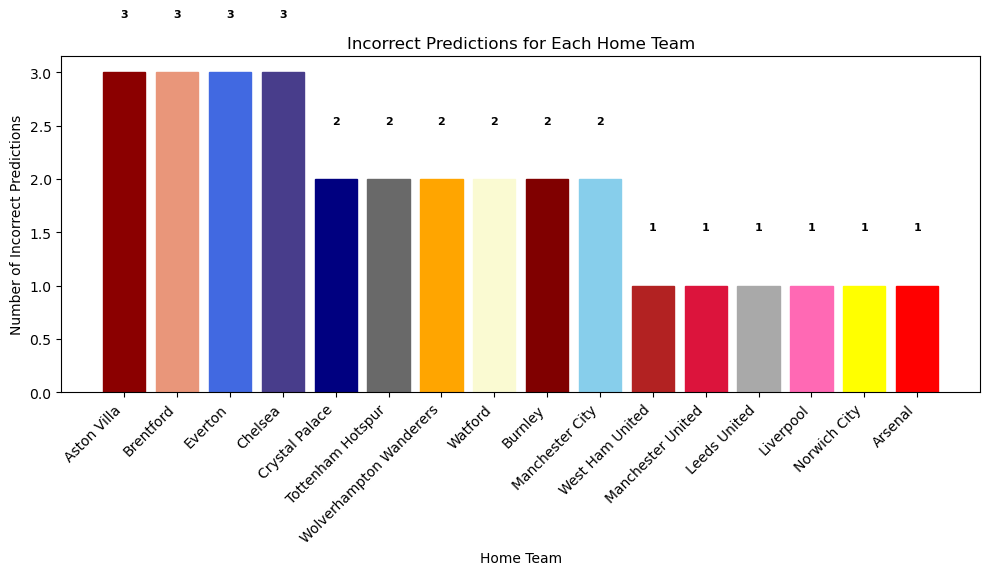

In [154]:
# Count the number of incorrect predictions for each team
incorrect_counts = incorrect_predictions['HomeTeam'].value_counts()

# Visualize incorrect predictions using a bar plot with different colors for each team
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Define colors for each team
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create bars with the specified colors for each team
bars = plt.bar(incorrect_counts.index, incorrect_counts.values)

# Set the colors of the bars based on the team colors dictionary
for bar, team in zip(bars, incorrect_counts.index):
    bar.set_color(team_colors[team])

plt.xlabel('Home Team')
plt.ylabel('Number of Incorrect Predictions')
plt.title('Incorrect Predictions for Each Home Team')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust the font size of the x-tick labels

# Add the number of incorrect predictions as text on the bars
for i, count in enumerate(incorrect_counts.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold', fontsize=8)  # Adjust the font size

plt.tight_layout()

# Print the total number of incorrect predictions
total_incorrect = incorrect_counts.sum()
print(f"Total Incorrect Predictions: {total_incorrect}")

plt.show()

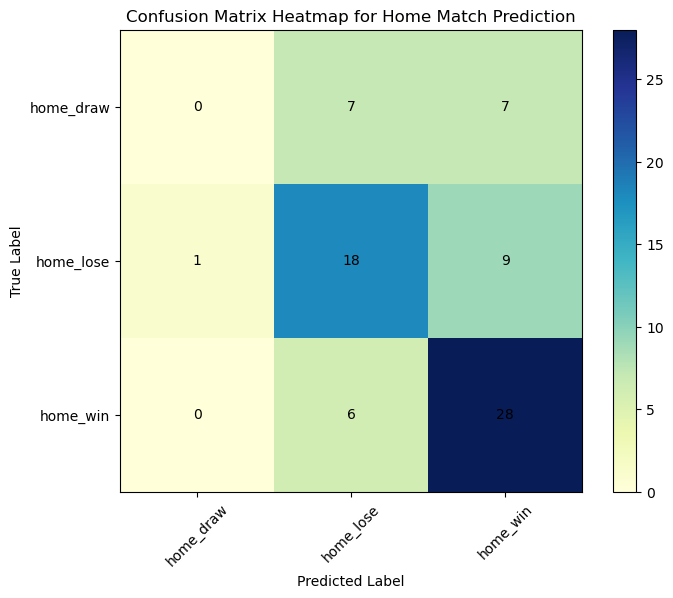

In [155]:
# Visualization using confusion matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['home_draw', 'home_lose', 'home_win'], columns=['home_draw', 'home_lose', 'home_win'])

# Create the heatmap using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(cm_df, interpolation='nearest', cmap='YlGnBu')

plt.title("Confusion Matrix Heatmap for Home Match Prediction")
plt.colorbar()
tick_marks = [0, 1, 2]
plt.xticks(tick_marks, ['home_draw', 'home_lose', 'home_win'], rotation=45)
plt.yticks(tick_marks, ['home_draw', 'home_lose', 'home_win'])

# Fill the heatmap cells with the confusion matrix values
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm_df.values[i, j]), ha='center', va='center', color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [156]:
# Prepare the data
X = df[['team_rank_home', 'team_rank_away']]
y = df['result_away']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Create a DataFrame for incorrect predictions
incorrect_predictions_away = pd.DataFrame({
    'HomeTeam': df.loc[X_test[y_test != y_pred].index, 'HomeTeam'].values,
    'AwayTeam': df.loc[X_test[y_test != y_pred].index, 'AwayTeam'].values,
    'team_rank_home': df.loc[X_test[y_test != y_pred].index, 'team_rank_home'].values,
    'team_rank_away': df.loc[X_test[y_test != y_pred].index, 'team_rank_away'].values,
    'Predicted_Result': y_pred[y_test != y_pred],
    'Actual_Result': y_test[y_test != y_pred]
})

# Generate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

print("\nIncorrect Predictions:")
print(incorrect_predictions)

Classification Report:
              precision    recall  f1-score   support

   away_draw       0.00      0.00      0.00        14
   away_lose       0.64      0.82      0.72        34
    away_win       0.58      0.64      0.61        28

    accuracy                           0.61        76
   macro avg       0.41      0.49      0.44        76
weighted avg       0.50      0.61      0.55        76


Incorrect Predictions:
                    HomeTeam                  AwayTeam  team_rank_home  \
33            Crystal Palace         Tottenham Hotspur              12   
363          West Ham United           Manchester City              18   
55         Manchester United               Aston Villa               6   
311        Tottenham Hotspur  Brighton and Hove Albion               4   
168  Wolverhampton Wanderers                   Chelsea              10   
116                  Watford         Manchester United              18   
358              Aston Villa            Crystal Palace

Total Incorrect Predictions: 30


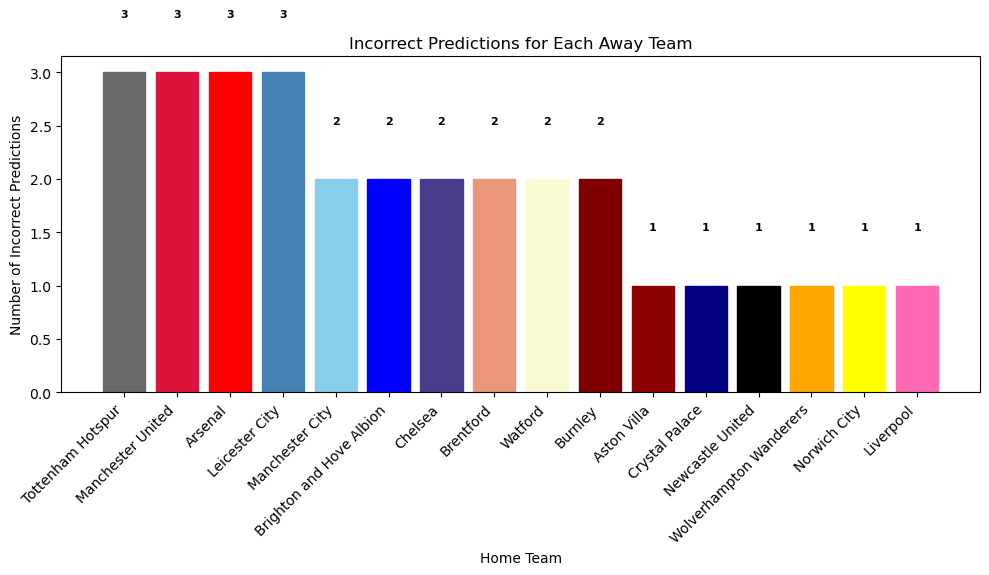

In [157]:
# Count the number of incorrect predictions for each team
incorrect_counts_away = incorrect_predictions['AwayTeam'].value_counts()

# Visualize incorrect predictions using a bar plot with different colors for each team
plt.figure(figsize=(10, 6))  # Adjust the figure size

# Define colors for each team
team_colors = {'Arsenal': 'red', 'Brighton and Hove Albion': 'blue', 'Crystal Palace': 'navy',
               'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
               'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Burnley': 'maroon',
               'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
               'Brentford': 'darksalmon', 'Norwich City': 'yellow', 'Watford': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
               'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'}

# Create bars with the specified colors for each team
bars = plt.bar(incorrect_counts_away.index, incorrect_counts_away.values)

# Set the colors of the bars based on the team colors dictionary
for bar, team in zip(bars, incorrect_counts_away.index):
    bar.set_color(team_colors[team])

plt.xlabel('Home Team')
plt.ylabel('Number of Incorrect Predictions')
plt.title('Incorrect Predictions for Each Away Team')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Adjust the font size of the x-tick labels

# Add the number of incorrect predictions as text on the bars
for i, count in enumerate(incorrect_counts_away.values):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontweight='bold', fontsize=8)  # Adjust the font size

plt.tight_layout()

# Print the total number of incorrect predictions
total_incorrect_away = incorrect_counts_away.sum()
print(f"Total Incorrect Predictions: {total_incorrect_away}")

plt.show()

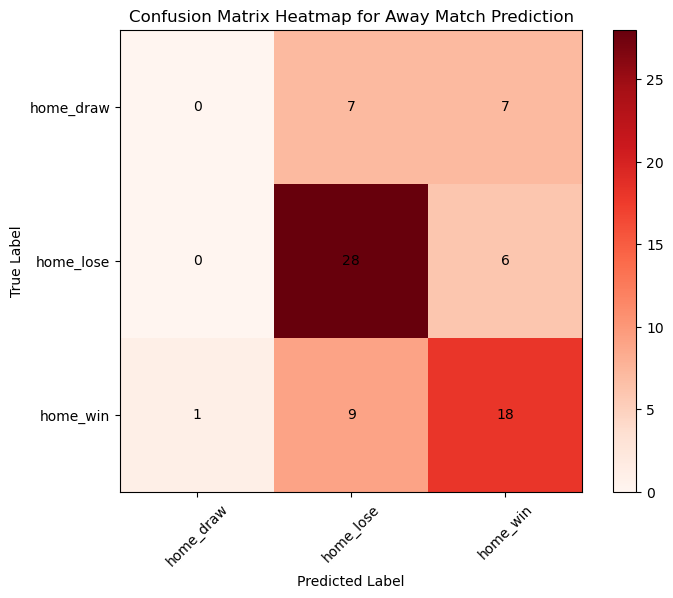

In [158]:
# Visualization using confusion matrix for away team

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to a DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=['home_draw', 'home_lose', 'home_win'], columns=['home_draw', 'home_lose', 'home_win'])

# Create the heatmap using matplotlib with red colormap
plt.figure(figsize=(8, 6))
plt.imshow(cm_df, interpolation='nearest', cmap='Reds')  # Use 'Reds' colormap

plt.title("Confusion Matrix Heatmap for Away Match Prediction")
plt.colorbar()
tick_marks = [0, 1, 2]
plt.xticks(tick_marks, ['home_draw', 'home_lose', 'home_win'], rotation=45)
plt.yticks(tick_marks, ['home_draw', 'home_lose', 'home_win'])

# Fill the heatmap cells with the confusion matrix values
for i in range(3):
    for j in range(3):
        plt.text(j, i, str(cm_df.values[i, j]), ha='center', va='center', color='black')

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## Use the training model on EPL 22/23 season

In [159]:
# Import testing dataset
epl22_23 = pd.read_csv('epl_22_23.csv')

In [160]:
# Create a new variable to rank the home team
def ranking_team_home(HomeTeam):
    if HomeTeam == 'Manchester City':
        return 1
    elif HomeTeam == 'Liverpool':
        return 2
    elif HomeTeam == 'Chelsea':
        return 3
    elif HomeTeam == 'Tottenham Hotspur':
        return 4
    elif HomeTeam == 'Arsenal':
        return 5
    elif HomeTeam == 'Manchester United':
        return 6
    elif HomeTeam == 'West Ham':
        return 7
    elif HomeTeam == 'Leicester City':
        return 8
    elif HomeTeam == 'Brighton and Hove Ablbion':
        return 9
    elif HomeTeam == 'Wolverhampton Wanderers':
        return 10
    elif HomeTeam == 'Newcastle United':
        return 11
    elif HomeTeam == 'Crystal Palace':
        return 12
    elif HomeTeam == 'Brentford':
        return 13
    elif HomeTeam == 'Aston Villa':
        return 14
    elif HomeTeam == 'Southampthon':
        return 15
    elif HomeTeam == 'Everton':
        return 16
    elif HomeTeam == 'Leeds United':
        return 17
    else:
        return 18
    
epl22_23['team_rank_home'] = epl22_23['HomeTeam'].apply(ranking_team_home)
print(epl22_23.head())

       Date        HomeTeam                 AwayTeam  team_rank_home
0  8/5/2022  Crystal Palace                  Arsenal              12
1  8/6/2022          Fulham                Liverpool              18
2  8/6/2022     Bournemouth              Aston Villa              18
3  8/6/2022    Leeds United  Wolverhampton Wanderers              17
4  8/6/2022  Leicester City                Brentford               8


In [161]:
# Create a new variable to rank the away team
def ranking_team_away(AwayTeam):
    if AwayTeam == 'Manchester City':
        return 1
    elif AwayTeam == 'Liverpool':
        return 2
    elif AwayTeam == 'Chelsea':
        return 3
    elif AwayTeam == 'Tottenham Hotspur':
        return 4
    elif AwayTeam == 'Arsenal':
        return 5
    elif AwayTeam == 'Manchester United':
        return 6
    elif AwayTeam == 'West Ham':
        return 7
    elif AwayTeam == 'Leicester City':
        return 8
    elif AwayTeam == 'Brighton and Hove Ablbion':
        return 9
    elif AwayTeam == 'Wolverhampton Wanderers':
        return 10
    elif AwayTeam == 'Newcastle United':
        return 11
    elif AwayTeam == 'Crystal Palace':
        return 12
    elif AwayTeam == 'Brentford':
        return 13
    elif AwayTeam == 'Aston Villa':
        return 14
    elif AwayTeam == 'Southampthon':
        return 15
    elif AwayTeam == 'Everton':
        return 16
    elif AwayTeam == 'Leeds United':
        return 17
    else:
        return 18
    
epl22_23['team_rank_away'] = epl22_23['AwayTeam'].apply(ranking_team_away)
print(epl22_23.head())

       Date        HomeTeam                 AwayTeam  team_rank_home  \
0  8/5/2022  Crystal Palace                  Arsenal              12   
1  8/6/2022          Fulham                Liverpool              18   
2  8/6/2022     Bournemouth              Aston Villa              18   
3  8/6/2022    Leeds United  Wolverhampton Wanderers              17   
4  8/6/2022  Leicester City                Brentford               8   

   team_rank_away  
0               5  
1               2  
2              14  
3              10  
4              13  


In [162]:
# Create a new dataset that is available for predictions
epl22_23_pred = epl22_23[['team_rank_home', 'team_rank_away']].copy()
print(epl22_23_pred.head())


   team_rank_home  team_rank_away
0              12               5
1              18               2
2              18              14
3              17              10
4               8              13


In [163]:
# Predict the result
predictions_away = model.predict(epl22_23_pred)
print(predictions_away)

['away_win' 'away_win' 'away_win' 'away_win' 'away_lose' 'away_lose'
 'away_lose' 'away_win' 'away_lose' 'away_win' 'away_lose' 'away_win'
 'away_lose' 'away_win' 'away_lose' 'away_lose' 'away_draw' 'away_lose'
 'away_draw' 'away_lose' 'away_win' 'away_lose' 'away_lose' 'away_win'
 'away_win' 'away_lose' 'away_win' 'away_win' 'away_lose' 'away_draw'
 'away_lose' 'away_draw' 'away_lose' 'away_lose' 'away_lose' 'away_lose'
 'away_win' 'away_lose' 'away_win' 'away_lose' 'away_win' 'away_lose'
 'away_draw' 'away_lose' 'away_lose' 'away_win' 'away_lose' 'away_win'
 'away_lose' 'away_lose' 'away_win' 'away_win' 'away_lose' 'away_lose'
 'away_win' 'away_lose' 'away_lose' 'away_draw' 'away_lose' 'away_lose'
 'away_draw' 'away_win' 'away_lose' 'away_win' 'away_lose' 'away_win'
 'away_lose' 'away_lose' 'away_lose' 'away_win' 'away_lose' 'away_win'
 'away_win' 'away_lose' 'away_lose' 'away_lose' 'away_lose' 'away_draw'
 'away_lose' 'away_win' 'away_win' 'away_win' 'away_lose' 'away_win'
 'away_lo

In [164]:
epl22_23['result_away'] = predictions_away
print(epl22_23.head())

       Date        HomeTeam                 AwayTeam  team_rank_home  \
0  8/5/2022  Crystal Palace                  Arsenal              12   
1  8/6/2022          Fulham                Liverpool              18   
2  8/6/2022     Bournemouth              Aston Villa              18   
3  8/6/2022    Leeds United  Wolverhampton Wanderers              17   
4  8/6/2022  Leicester City                Brentford               8   

   team_rank_away result_away  
0               5    away_win  
1               2    away_win  
2              14    away_win  
3              10    away_win  
4              13   away_lose  


In [165]:
# Create a new variable for result of home team
def result_team_home(result_away):
    if result_away == 'away_win':
        return 'home_lose'
    elif result_away == 'away_lose':
        return 'home_win'
    else:
        return 'home_draw'
    
epl22_23['result_home'] = epl22_23['result_away'].apply(result_team_home)
print(epl22_23.head())

       Date        HomeTeam                 AwayTeam  team_rank_home  \
0  8/5/2022  Crystal Palace                  Arsenal              12   
1  8/6/2022          Fulham                Liverpool              18   
2  8/6/2022     Bournemouth              Aston Villa              18   
3  8/6/2022    Leeds United  Wolverhampton Wanderers              17   
4  8/6/2022  Leicester City                Brentford               8   

   team_rank_away result_away result_home  
0               5    away_win   home_lose  
1               2    away_win   home_lose  
2              14    away_win   home_lose  
3              10    away_win   home_lose  
4              13   away_lose    home_win  


In [166]:
# Create a new variable for point of home team
def point_team_home(result_home):
    if result_home == 'home_win':
        return 3
    elif result_home == 'home_lose':
        return 0
    else:
        return 1
    
epl22_23['point_home'] = epl22_23['result_home'].apply(point_team_home)

# create a new variable for point of away team
def point_team_away(result_away):
    if result_away == 'away_win':
        return 3
    elif result_away == 'away_lose':
        return 0
    else:
        return 1

epl22_23['point_away'] = epl22_23['result_away'].apply(point_team_away)
print(epl22_23.head())

       Date        HomeTeam                 AwayTeam  team_rank_home  \
0  8/5/2022  Crystal Palace                  Arsenal              12   
1  8/6/2022          Fulham                Liverpool              18   
2  8/6/2022     Bournemouth              Aston Villa              18   
3  8/6/2022    Leeds United  Wolverhampton Wanderers              17   
4  8/6/2022  Leicester City                Brentford               8   

   team_rank_away result_away result_home  point_home  point_away  
0               5    away_win   home_lose           0           3  
1               2    away_win   home_lose           0           3  
2              14    away_win   home_lose           0           3  
3              10    away_win   home_lose           0           3  
4              13   away_lose    home_win           3           0  


In [167]:
# Group by 'HomeTeam' and sum the points earned for each team
home_points = epl22_23.groupby('HomeTeam')['point_home'].sum()

# Group by 'AwayTeam' and sum the points earned for each team
away_points = epl22_23.groupby('AwayTeam')['point_away'].sum()

# Combine home_points and away_points to get total points for each team
total_points = home_points.add(away_points, fill_value=0)

# Sort the total_points in descending order
total_points_sorted = total_points.sort_values(ascending=False)

# Display the total points for each team in descending order
print(total_points_sorted)

HomeTeam
Manchester City            105
Liverpool                  102
Tottenham Hotspur           99
Chelsea                     99
Arsenal                     96
Manchester United           90
Leicester City              78
Wolverhampton Wanderers     69
Newcastle United            63
Crystal Palace              60
Brentford                   57
Aston Villa                 51
Everton                     30
Leeds United                27
Fulham                      12
Brighton & Hove Albion      12
Nottingham Forest           12
Southampton                 12
Bournemouth                 12
West Ham United             12
dtype: int64


In [177]:
# Create an empty dictionary to store the total number of 'home_win' for each team
home_wins_dict = {}

# Iterate over each team in the 'HomeTeam' column
for team in epl22_23['HomeTeam'].unique():
    # Filter the DataFrame for matches where the team is in 'HomeTeam' and has 'home_win'
    home_win_count = epl22_23.loc[(epl22_23['HomeTeam'] == team) & (epl22_23['result_home'] == 'home_win')].shape[0]
    # Add the team and the corresponding 'home_win' count to the dictionary
    home_wins_dict[team] = home_win_count

# Create a DataFrame from the dictionary
team_home_win = pd.DataFrame(list(home_wins_dict.items()), columns=['Team', 'total_home_wins'])

print(team_home_win)

                       Team  total_home_wins
0            Crystal Palace               12
1                    Fulham                0
2               Bournemouth                0
3              Leeds United                7
4            Leicester City               14
5          Newcastle United               12
6         Tottenham Hotspur               19
7                   Everton                8
8         Manchester United               17
9           West Ham United                0
10              Aston Villa               10
11   Brighton & Hove Albion                0
12                  Arsenal               18
13                Brentford               11
14                  Chelsea               19
15                Liverpool               19
16              Southampton                0
17          Manchester City               19
18        Nottingham Forest                0
19  Wolverhampton Wanderers               13


In [178]:
# Create an empty dictionary to store the total number of 'away_win' for each team
away_wins_dict = {}

# Iterate over each team in the 'AwayTeam' column
for team in epl22_23['AwayTeam'].unique():
    # Filter the DataFrame for matches where the team is in 'AwayTeam' and has 'away_win'
    away_win_count = epl22_23.loc[(epl22_23['AwayTeam'] == team) & (epl22_23['result_away'] == 'away_win')].shape[0]
    # Add the team and the corresponding 'away_win' count to the dictionary
    away_wins_dict[team] = away_win_count

# Create a DataFrame from the dictionary
team_away_win = pd.DataFrame(list(away_wins_dict.items()), columns=['Team', 'total_away_wins'])

print(team_away_win)

                       Team  total_away_wins
0                   Arsenal               14
1                 Liverpool               15
2               Aston Villa                7
3   Wolverhampton Wanderers               10
4                 Brentford                8
5         Nottingham Forest                0
6               Southampton                0
7                   Chelsea               14
8    Brighton & Hove Albion                0
9           Manchester City               16
10                  Everton                0
11         Newcastle United                9
12           Leicester City               12
13        Manchester United               13
14        Tottenham Hotspur               14
15           Crystal Palace                8
16             Leeds United                0
17              Bournemouth                0
18          West Ham United                0
19                   Fulham                0


In [179]:
# Calculate the total wins for each team
# Merge the 'team_home_win' and 'team_away_win' DataFrames on the 'Team' column
team_wins = pd.merge(team_home_win, team_away_win, on='Team', how='outer')

# Fill missing values (NaN) with 0
team_wins.fillna(0, inplace=True)

# Calculate the total wins for each team (sum of home wins and away wins)
team_wins['TotalWins'] = team_wins['total_home_wins'] + team_wins['total_away_wins']

print(team_wins)

                       Team  total_home_wins  total_away_wins  TotalWins
0            Crystal Palace               12                8         20
1                    Fulham                0                0          0
2               Bournemouth                0                0          0
3              Leeds United                7                0          7
4            Leicester City               14               12         26
5          Newcastle United               12                9         21
6         Tottenham Hotspur               19               14         33
7                   Everton                8                0          8
8         Manchester United               17               13         30
9           West Ham United                0                0          0
10              Aston Villa               10                7         17
11   Brighton & Hove Albion                0                0          0
12                  Arsenal               18       

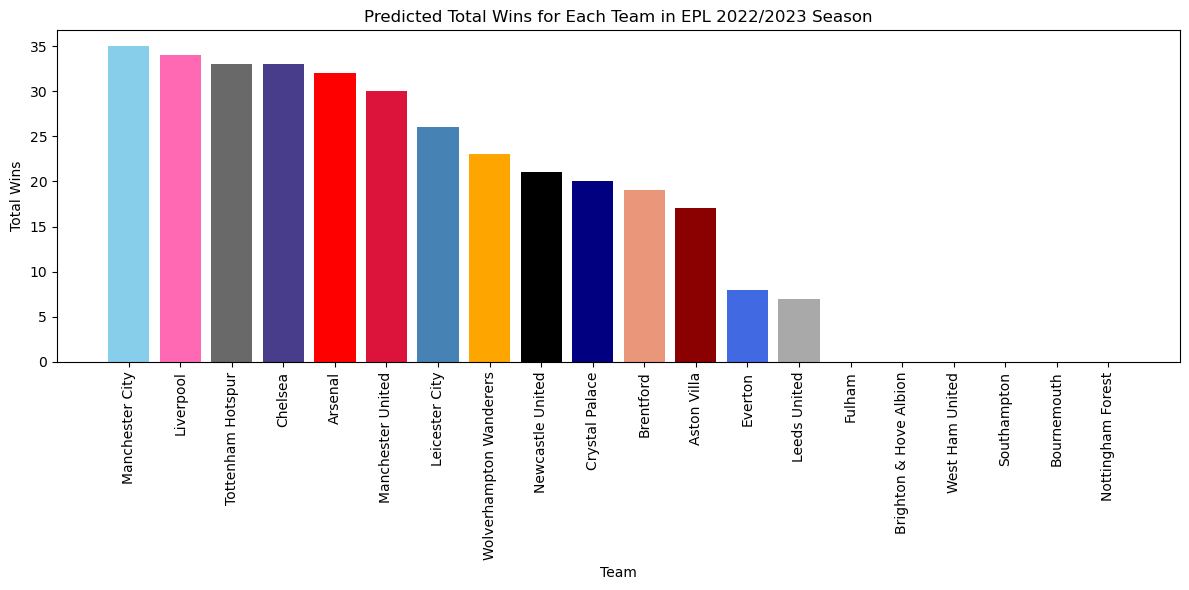

In [181]:
# visualize the number of wins for each team

# Sort the DataFrame by 'TotalWins' column in descending order
team_wins = team_wins.sort_values(by='TotalWins', ascending=False)

# Define the team colors dictionary
team_colors = {
    'Arsenal': 'red', 'Brighton & Hove Albion': 'blue', 'Crystal Palace': 'navy',
    'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
    'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Bournemouth': 'maroon',
    'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
    'Brentford': 'darksalmon', 'Nottingham Forest': 'yellow', 'Fulham': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
    'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'
}

# Create the bar plot with team colors
plt.figure(figsize=(12, 6))  # Set the figure size to make the plot more readable
plt.bar(team_wins['Team'], team_wins['TotalWins'], color=[team_colors.get(team, 'grey') for team in team_wins['Team']])

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Total Wins')
plt.title('Predicted Total Wins for Each Team in EPL 2022/2023 Season')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # To avoid label overlapping
plt.show()

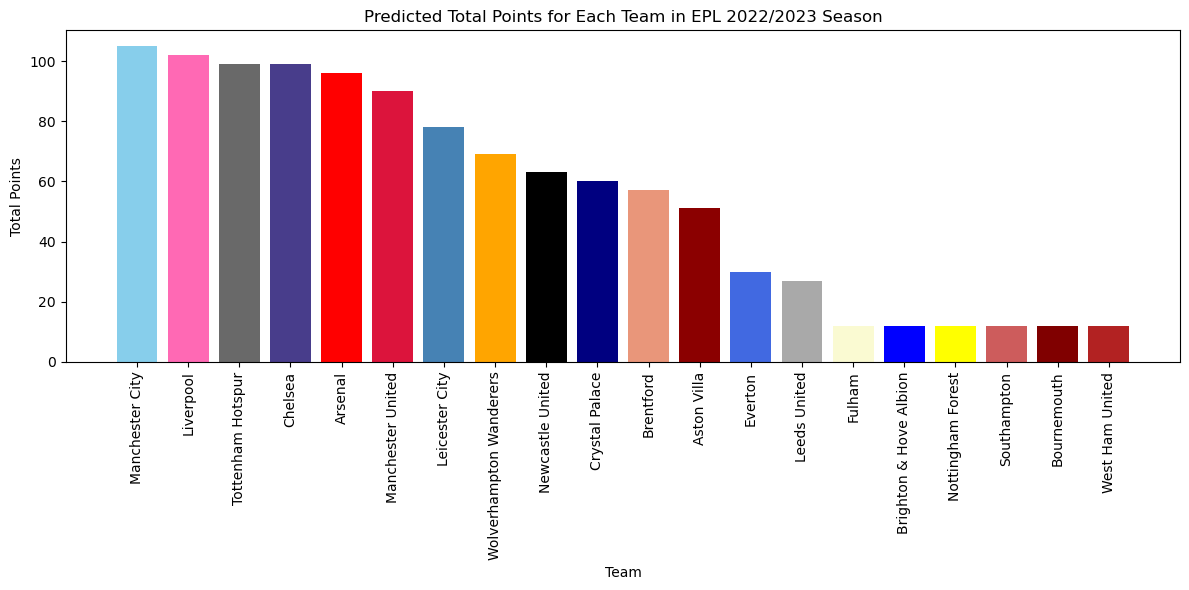

In [184]:
# Visualize the number of points for each team

# Define the team colors dictionary
team_colors = {
    'Arsenal': 'red', 'Brighton & Hove Albion': 'blue', 'Crystal Palace': 'navy',
    'Southampton': 'indianred', 'Wolverhampton Wanderers': 'orange', 'Manchester United': 'crimson',
    'Chelsea': 'darkslateblue', 'Leeds United': 'darkgrey', 'Newcastle United': 'black', 'Bournemouth': 'maroon',
    'Aston Villa': 'darkred', 'West Ham United': 'firebrick', 'Leicester City': 'steelblue', 'Liverpool': 'hotpink',
    'Brentford': 'darksalmon', 'Nottingham Forest': 'yellow', 'Fulham': 'lightgoldenrodyellow', 'Manchester City': 'skyblue',
    'Everton': 'royalblue', 'Tottenham Hotspur': 'dimgrey'
}

# Create the bar plot with team colors
plt.figure(figsize=(12, 6))  # Set the figure size to make the plot more readable
plt.bar(total_points_sorted.index, total_points_sorted.values, color=[team_colors.get(team, 'grey') for team in total_points_sorted.index])

# Add labels and title
plt.xlabel('Team')
plt.ylabel('Total Points')
plt.title('Predicted Total Points for Each Team in EPL 2022/2023 Season')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()  # To avoid label overlapping
plt.show()